In [1]:
import pandas as pd
from moviepy.editor import *
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import numpy as np

In [2]:
# this can be empty if the video file and its videopipe output are at the same
# location as the code
path = ''
v_name = 'HIGH_LIGHTS_I_SNOWMAGAZINE_I_SANDER_26'
task = '_text_detection_datamodel'
w, h = 1920, 1080
RESIZE_DIM = 640

In [3]:
## read text detection json

text = pd.read_json(path + v_name + '/' + v_name + task + '.json', lines = True)

text_detected = [f for f in text.data[0] if len(f['text']) > 0]

frames = [f['dimension_idx'] for f in text_detected]

In [4]:
## read video file with moviepy

clip = VideoFileClip(v_name + '.mp4')

fps = clip.fps
frame_duration = 1 / fps

imgs = []

In [5]:
def get_frame(clip, frame_number):
    return Image.fromarray(clip.get_frame(frame_number * frame_duration))

In [6]:
# Requires font in /usr/share/fonts/truetype.
font = ImageFont.truetype("Lato-Bold.ttf", 20)

i = 0
for f in text_detected:
    img = get_frame(clip, f['dimension_idx'])
    w, h = img.size

    texts = f['text']

    for text in texts:
        left, top, width, height, conf, text = texts[text].values()
        draw = ImageDraw.Draw(img)
        draw.rectangle(((left, top), ((left + width), (top + height))), outline = 'red')
        text = text + " (conf: " + str(conf) + ")"
        draw.text((left, top), text, font=font, fill = 'red')
    imgs.append(img)


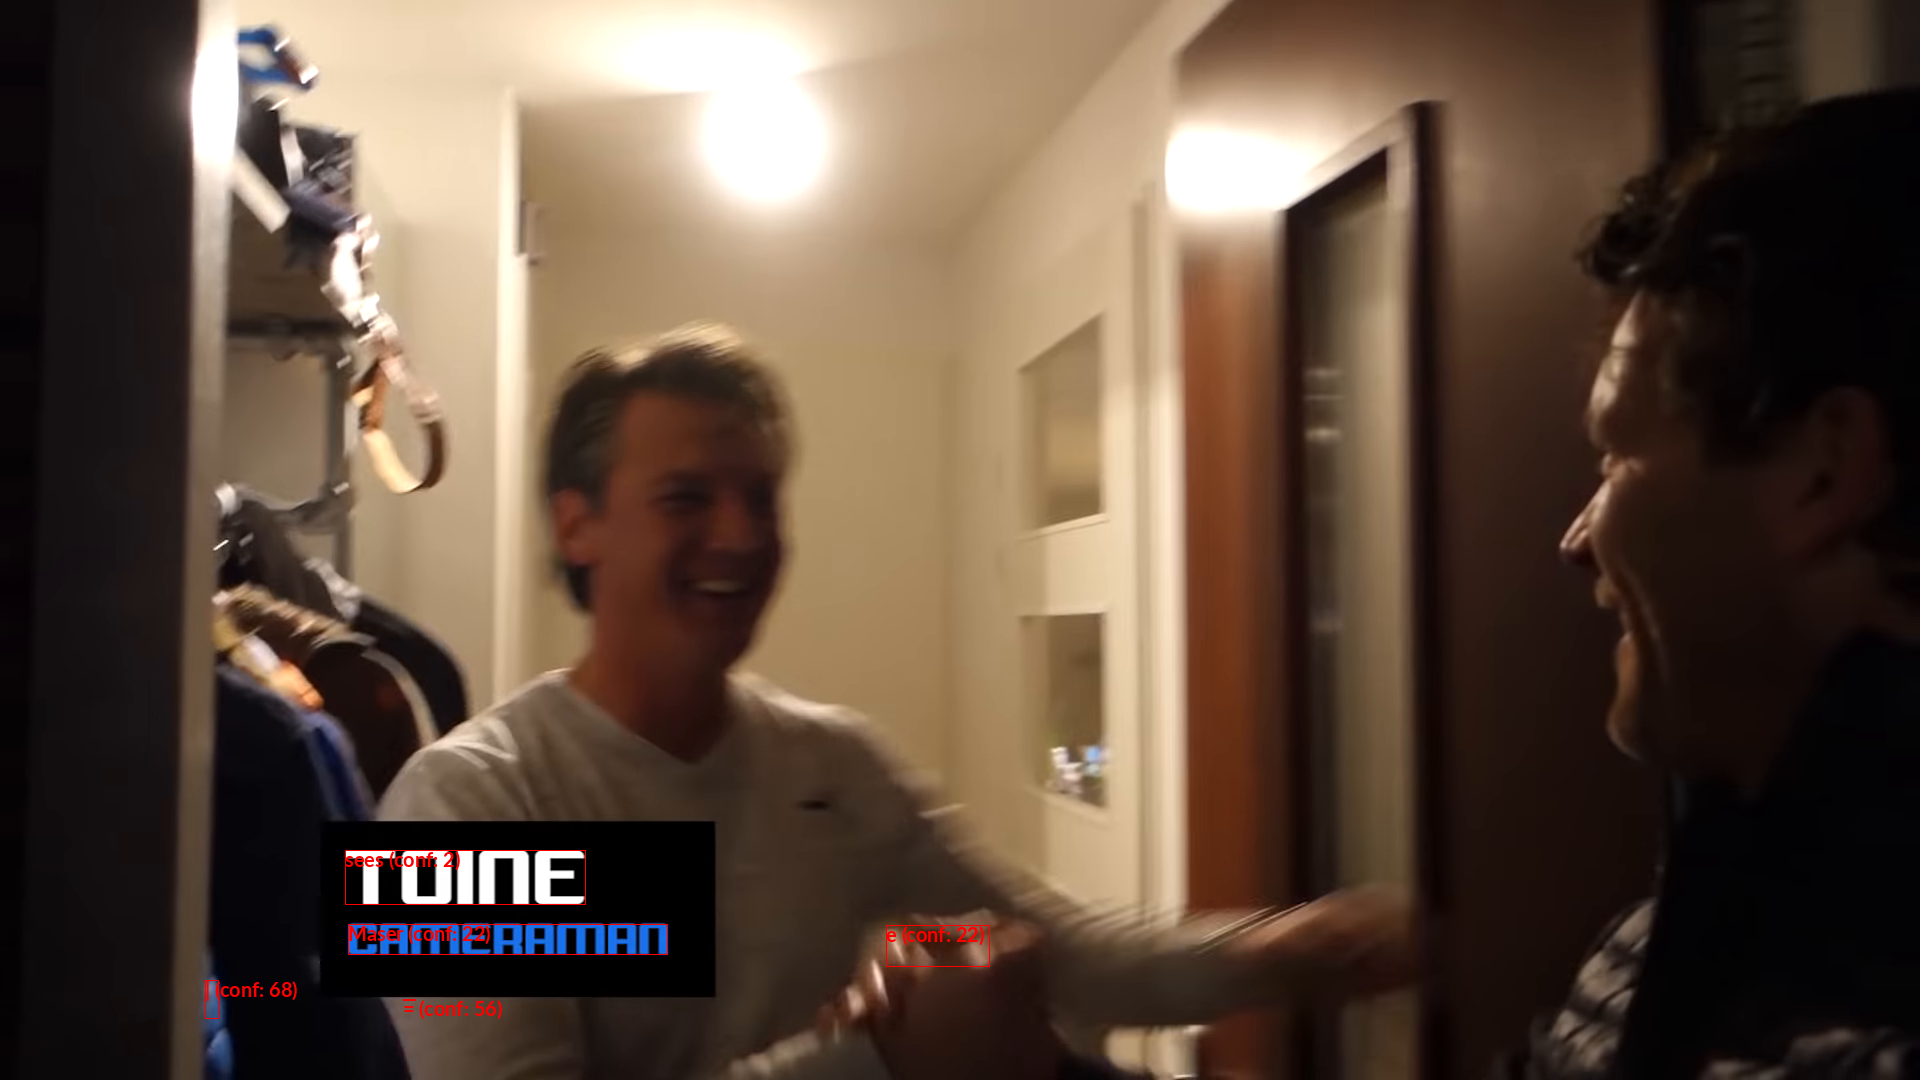

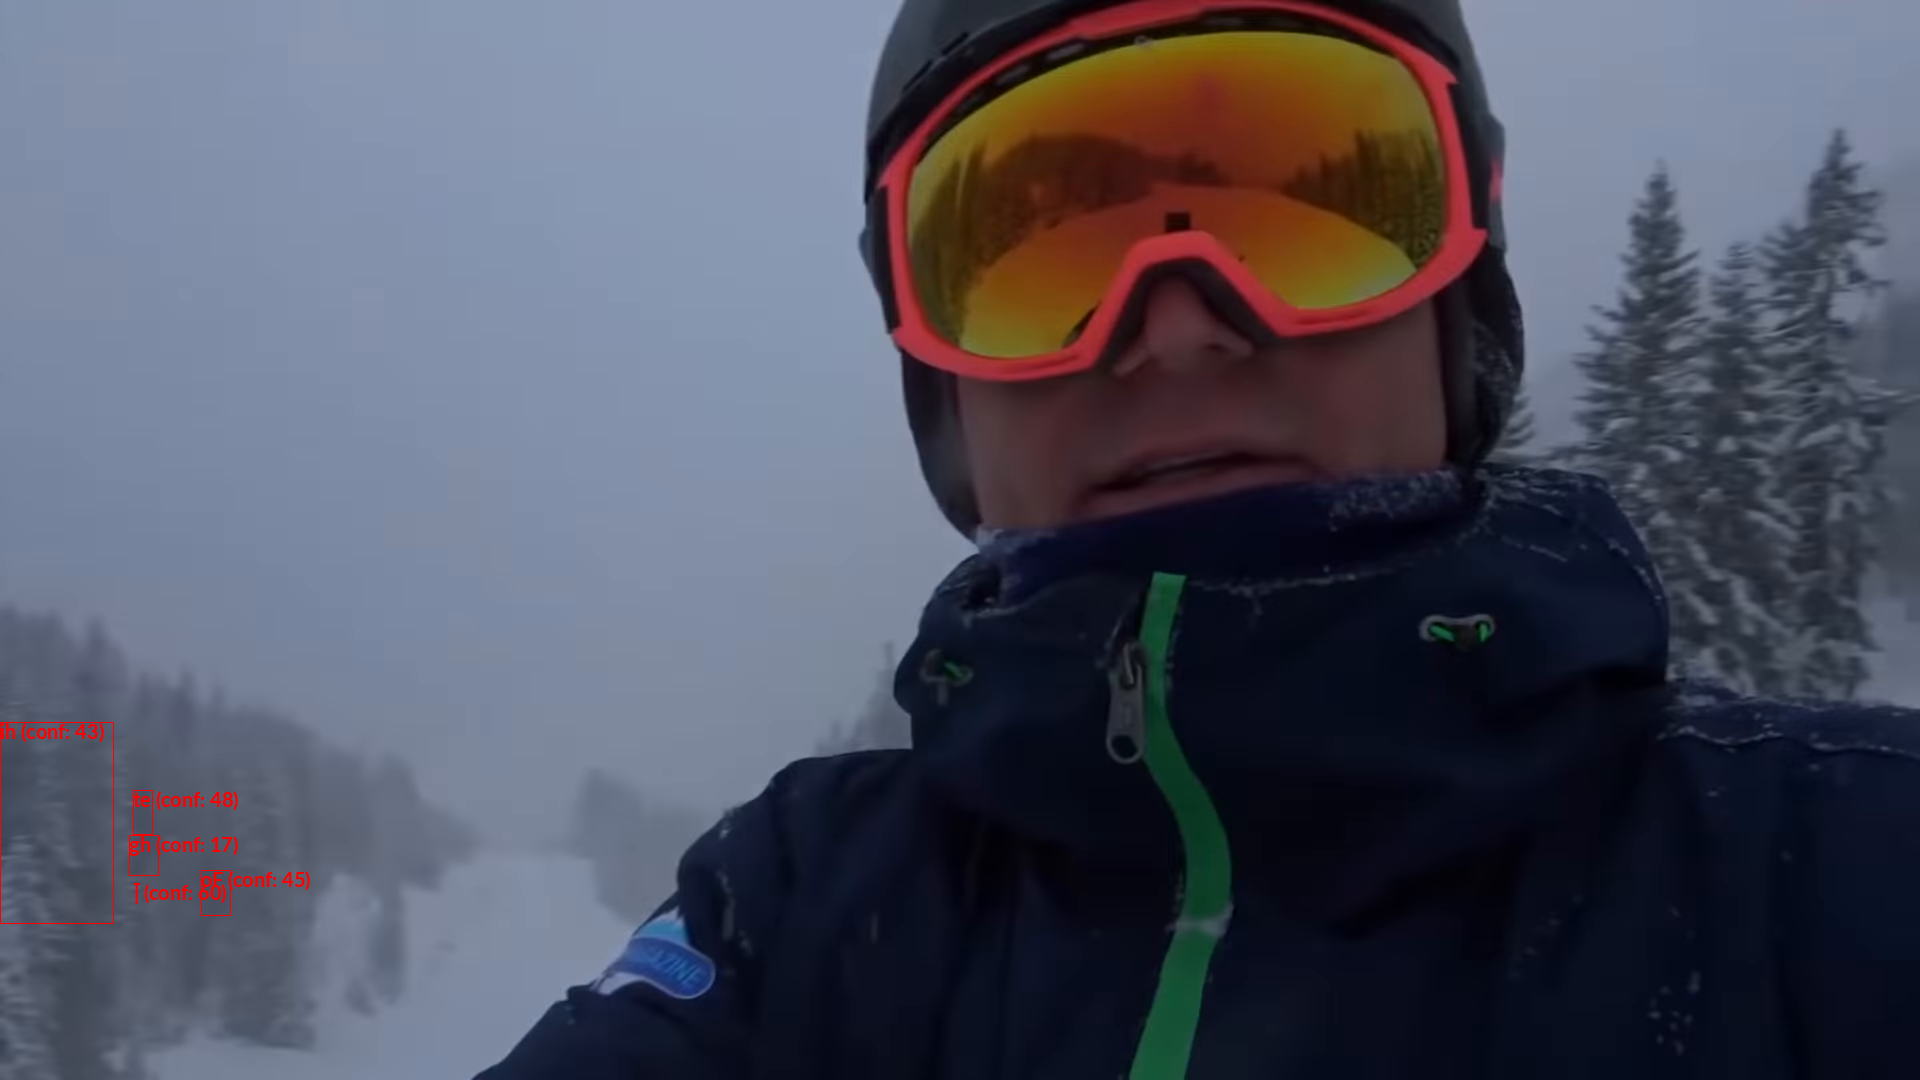

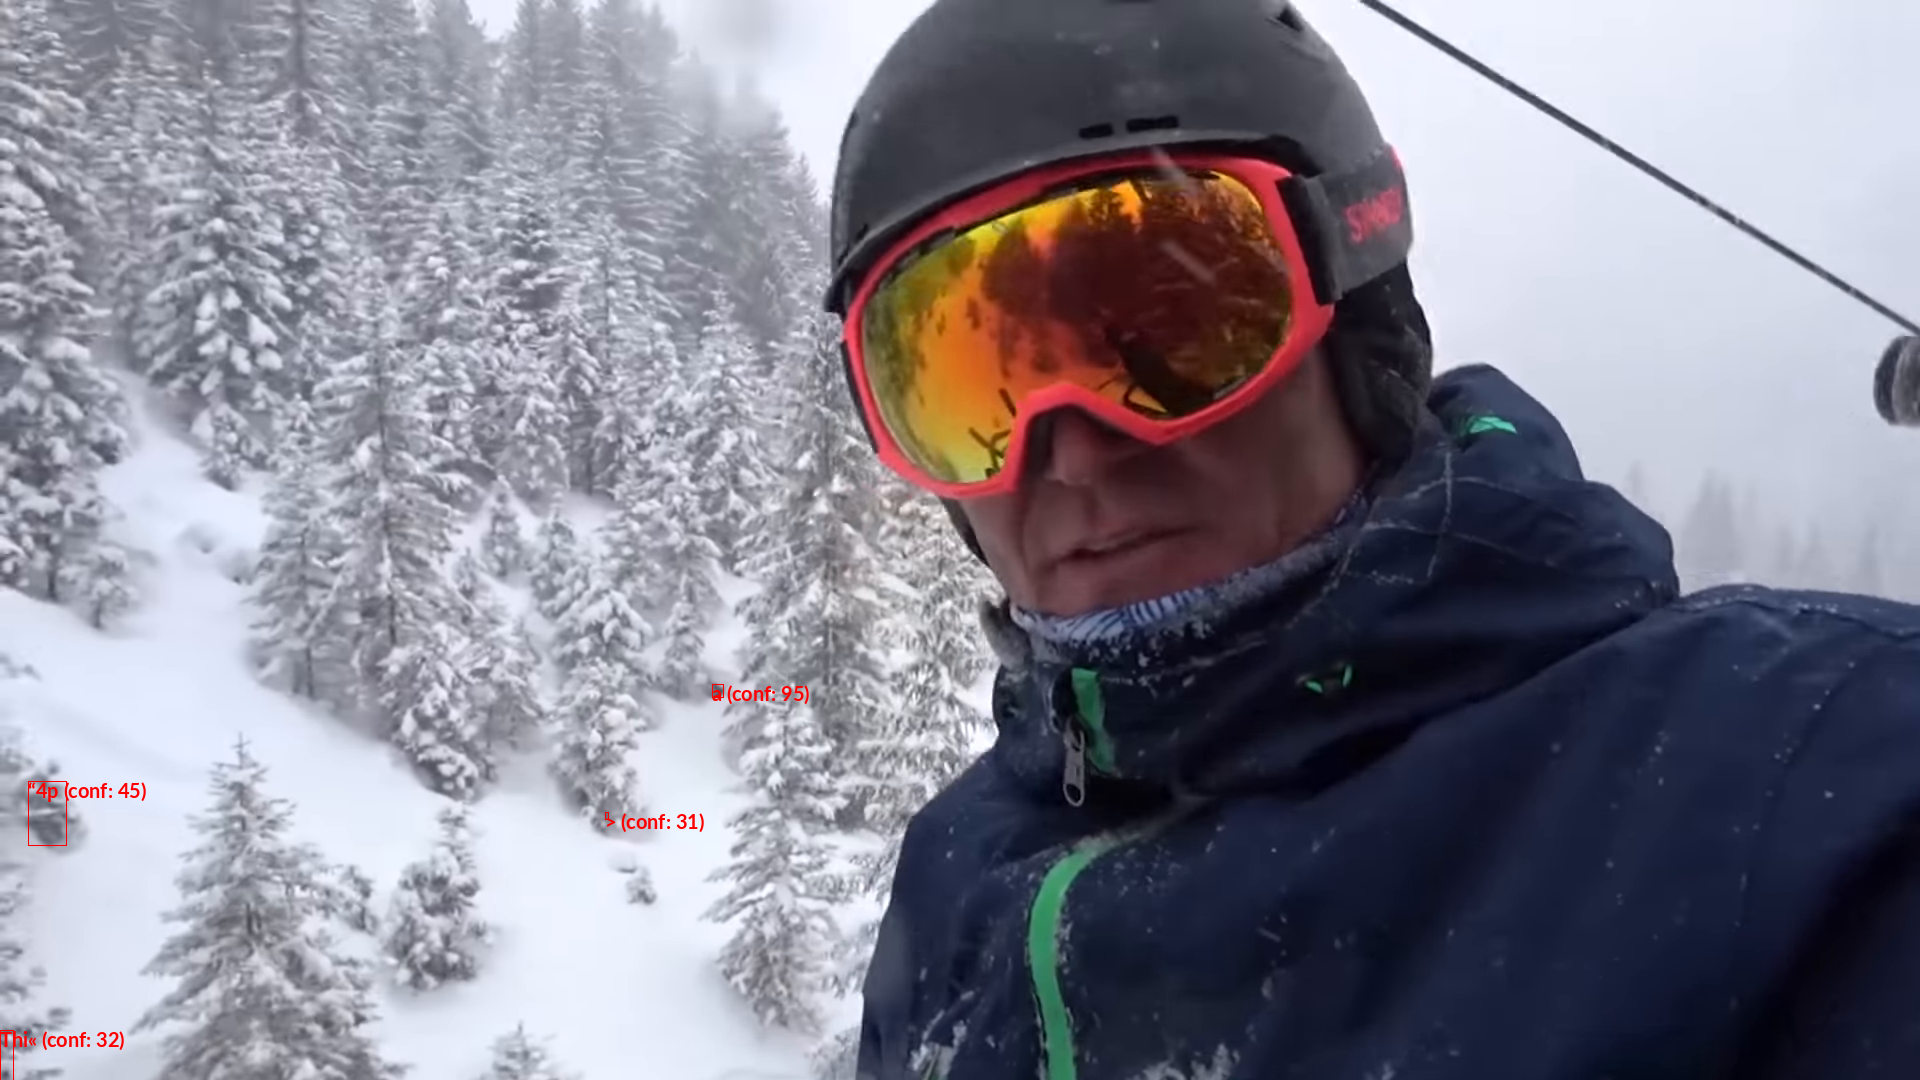

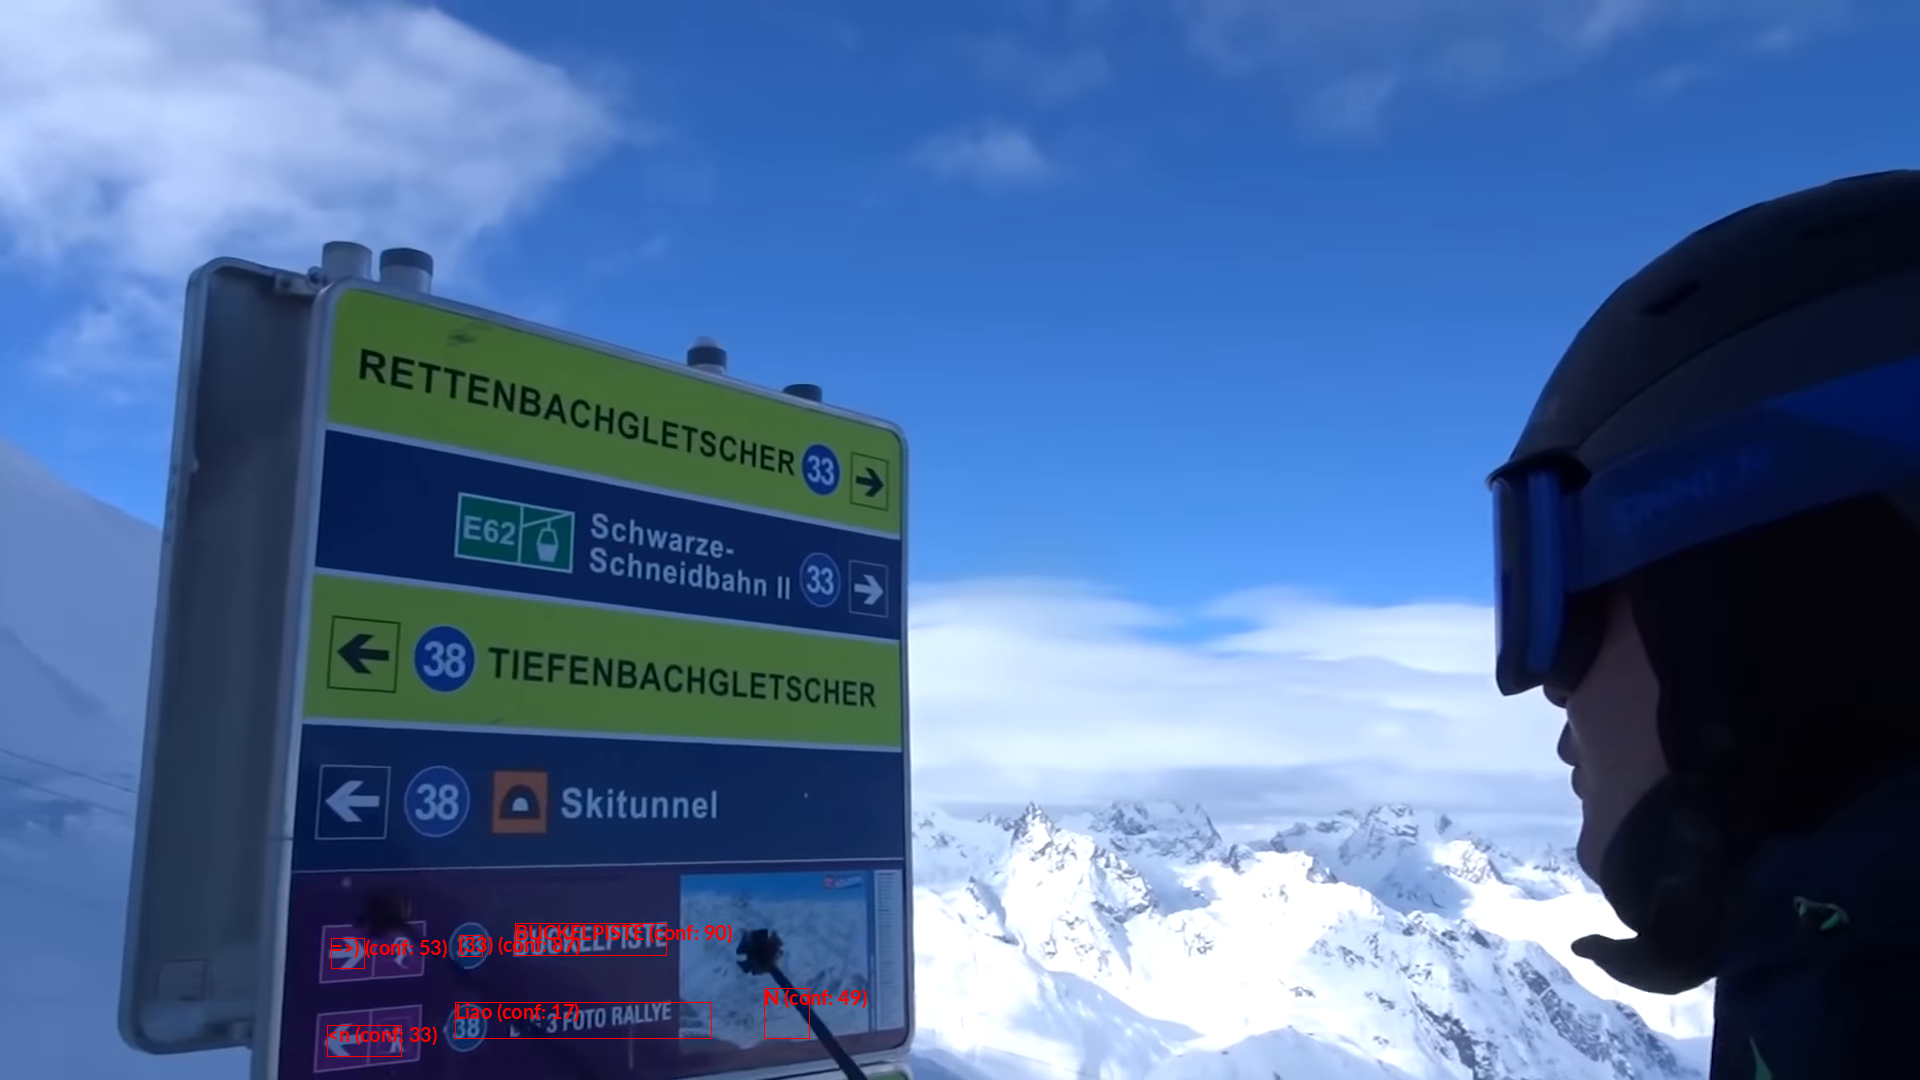

In [7]:
for img in imgs:
    display(img)